# Retrieve Tweet Text

In [20]:
import os
import tweepy as tw
import pandas as pd
import numpy as np
import csv
import re
import string
import preprocessor as p
from tweepy import *

In [2]:
# assign the values accordingly
consumer_key = "aODPYB1Gbw8dyCgACFcAwO6wI"
consumer_key_secret = "F08P3xpxCbhKy0a2cxjM0b1HjV6qzSDIvdPRVKBrq09YI0PA79"
access_token = "1429992676665958446-8ewNMBPjUzZHaIfCEBuN2NQcThg2aH"
access_token_secret = "IVuX29eSqQUDW98tz3AeqspLJRbkP6oPKHjKNUFbR2b6v"

# authorization of consumer key and consumer secret
auth=tw.OAuthHandler(consumer_key,consumer_key_secret)

# set access to user's access key and access secret 
auth.set_access_token(access_token, access_token_secret)

# calling the api 
api = tw.API(auth)

# the ID of the status
ID=1222995621772025856

In [4]:
#obtaining the status
status=api.get_status(ID)

#printing the text of the status
print(status.text)

Here is an AWESOME update on the Coronavirus. If you have any questions, or just want to stay educated, please read… https://t.co/uZQv1fMaB9


# Wordcloud

## top 10 low sentiment text

In [8]:
import preprocessor as p
from tweepy import *
from textblob import TextBlob
from wordcloud import WordCloud

In [9]:
filename=r"C:\Users\Administrator\Desktop\10low text.csv"
with open(filename, encoding='utf8')as f:
    text=f.read()

In [11]:
#read the text using API and generate a wordcloud
wordcloud=WordCloud().generate(text)

Populating the interactive namespace from numpy and matplotlib


C:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['text', 'place', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


(-0.5, 399.5, 199.5, -0.5)

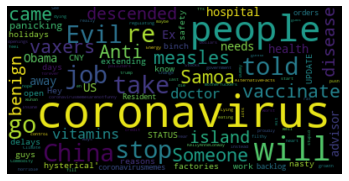

In [12]:
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## top 10 high sentiment text

In [13]:
filename=r"C:\Users\Administrator\Desktop\10high text.csv"
with open(filename, encoding='utf8')as f:
    text=f.read()

In [15]:
#read the text using API and generate a wordcloud (without downloading)
wordcloud=WordCloud().generate(text)

Populating the interactive namespace from numpy and matplotlib


C:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['text', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


(-0.5, 399.5, 199.5, -0.5)

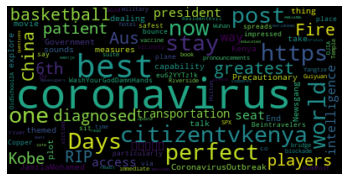

In [16]:
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Country Frequency Analysis

In [18]:
dataset=pd.read_csv(r'C:\Users\Administrator\Desktop\Janurary Tweet.txt',delimiter='\t',header=None)
dataset.columns=['Tweet ID', 'Date', 'Time', 'Language', 'Country']

In [19]:
dataset['Country'].value_counts().sort_index()

AE      1
AU     12
BN      2
BR      1
BW      1
CA     12
CH      1
CL      1
CN      8
CO      1
CY      1
CZ      1
DE      1
DO      1
EC      1
EG      1
ET      1
FJ      1
FR      1
GB     16
HK      2
ID      2
IE      1
IN      5
JM      3
JP      1
KR      2
LK      3
MM      1
MY      9
NG      7
NZ      1
PH     14
PK      1
PL      1
PT      1
SG      1
TH      1
TW      1
US    104
VN      1
ZA      6
Name: Country, dtype: int64

In [21]:
full_data= pd.DataFrame([['AE',1], ['AU',12], ['BN',2],['BR',1],['BW',1],['CA',12], ['CH',1],['CL',1],
                            ['CN',8], ['CO',1],['CY',1],['CZ',1],['DE',1], ['DO',1],['EC',1],['EG',1],
                            ['ET',1],['FJ',1],['FR',1],['GB',16],['HK',2], ['ID',2], ['IE',1],['IN',5],
                            ['JM',3],['JP',1],['KR',2], ['LK',3],['MM',1],['MY',9], ['NG',7],['NZ',1],
                            ['PH',14], ['PK',1],['PL',1],['PT',1], ['SG',1],['TH',1],['TW',1], ['US',104],
                            ['VN',1],['ZA',6]],
                          columns=['Country', 'Number of Tweets'])

display(full_data)

,Country,Number of Tweets
0,AE,1
1,AU,12
2,BN,2
3,BR,1
4,BW,1
5,CA,12
6,CH,1
7,CL,1
8,CN,8
9,CO,1


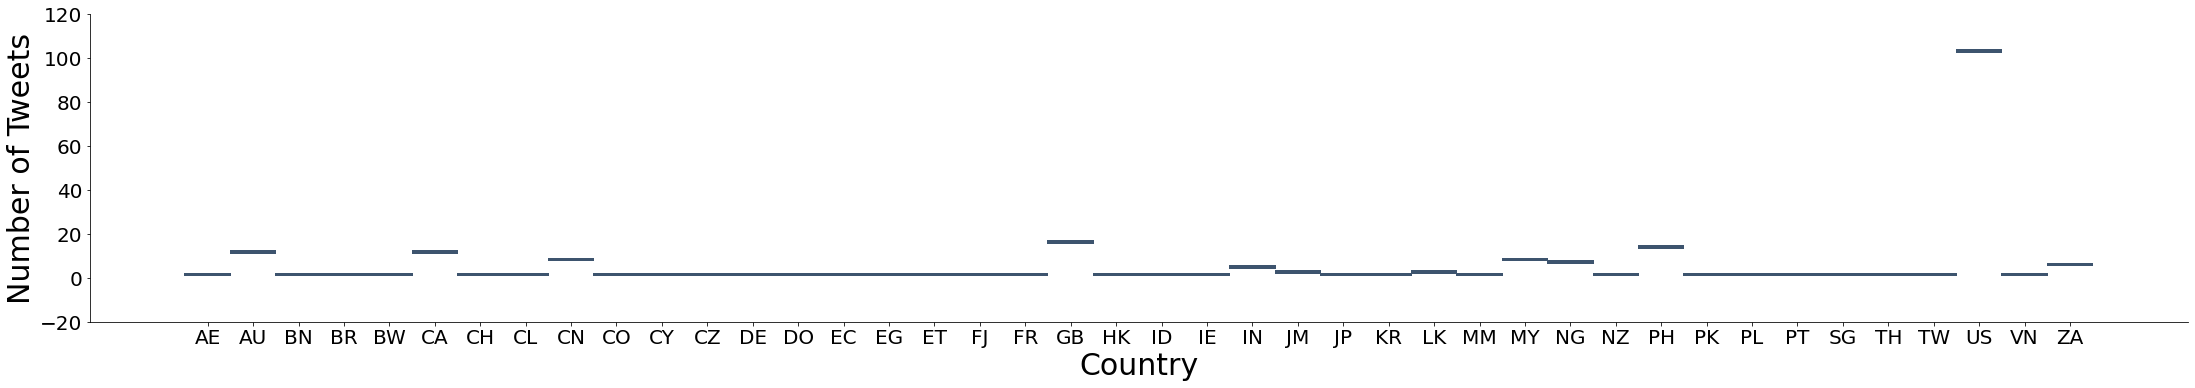

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import timeit

country_graph=sns.displot(data=full_data, x="Country", y="Number of Tweets", height=5, aspect=6, kind="hist")
country_graph.set_axis_labels("Country", "Number of Tweets", size=30)
country_graph.set_xticklabels(size=20)
country_graph.set_yticklabels(size=20)
plt.show()